In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [64]:
country = pd.read_csv("../data/Country-data.csv", index_col='country')
country.drop(labels="Myanmar", axis=0, inplace=True)

In [65]:
X1 = 'income'
X2 = 'gdpp'
vars = ['income', 'gdpp']
vars_total = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

In [66]:
model_raw = KMeans(n_clusters=3,
                    n_init=100,
                    max_iter=1000,
                    random_state=42)

model_raw.fit(country[vars])
country['clusters'] = model_raw.predict(country[vars])

In [67]:
cluster_0 = len(country[country['clusters'] == 0])
cluster_1 = len(country[country['clusters'] == 1])
cluster_2 = len(country[country['clusters'] == 2])

In [68]:
print(f"""Cluster 0: {cluster_0}
Cluster 1: {cluster_1}
Cluster 2: {cluster_2}""")

Cluster 0: 127
Cluster 1: 7
Cluster 2: 32


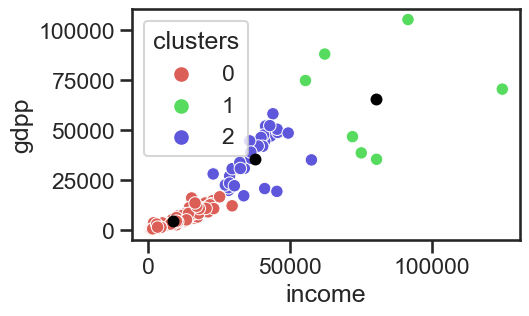

In [69]:
centroids = model_raw.cluster_centers_
plt.figure(figsize = (5,3))
sns.scatterplot(data =country, x=X1,y=X2, hue=country['clusters'],palette=sns.color_palette('hls', 3))

plt.scatter(centroids[:,0], centroids[:,1] , c= 'black', s=50)
plt.show()

In [70]:
cluster_0 = country[country['clusters']==0]
cluster_1 = country[country['clusters']==1]
cluster_2 = country[country['clusters']==2]
cluster_0['dist_2'] = (cluster_0[X1]-centroids[0,0])**2 + (cluster_0[X2]-centroids[0,1])**2
cluster_1['dist_2'] = (cluster_1[X1]-centroids[0,0])**2 + (cluster_1[X2]-centroids[0,1])**2
cluster_2['dist_2'] = (cluster_2[X1]-centroids[0,0])**2 + (cluster_2[X2]-centroids[0,1])**2
index_min_0 = cluster_0['dist_2'][cluster_0['dist_2'] == cluster_0['dist_2'].min()].index
index_min_1 = cluster_1['dist_2'][cluster_1['dist_2'] == cluster_1['dist_2'].min()].index
index_min_2 = cluster_2['dist_2'][cluster_2['dist_2'] == cluster_2['dist_2'].min()].index

In [71]:
print(f"""Os 3 países que representam os cluster nos dados originais são:
Cluster 0: {index_min_0[0]}
Cluster 1: {index_min_1[0]}
Cluster 2: {index_min_2[0]}""")

Os 3 países que representam os cluster nos dados originais são:
Cluster 0: Jamaica
Cluster 1: Kuwait
Cluster 2: Czech Republic


____________________________

In [72]:
linkage = ['ward', 'complete', 'average', 'single']
distribuicao =[]
for i in range(0,4):
    model_aglo = AgglomerativeClustering(n_clusters=3, linkage=linkage[i]).fit(country)
    count = model_aglo.labels_
    distribuicao.append(count)
   
distribuicao = pd.DataFrame(distribuicao)

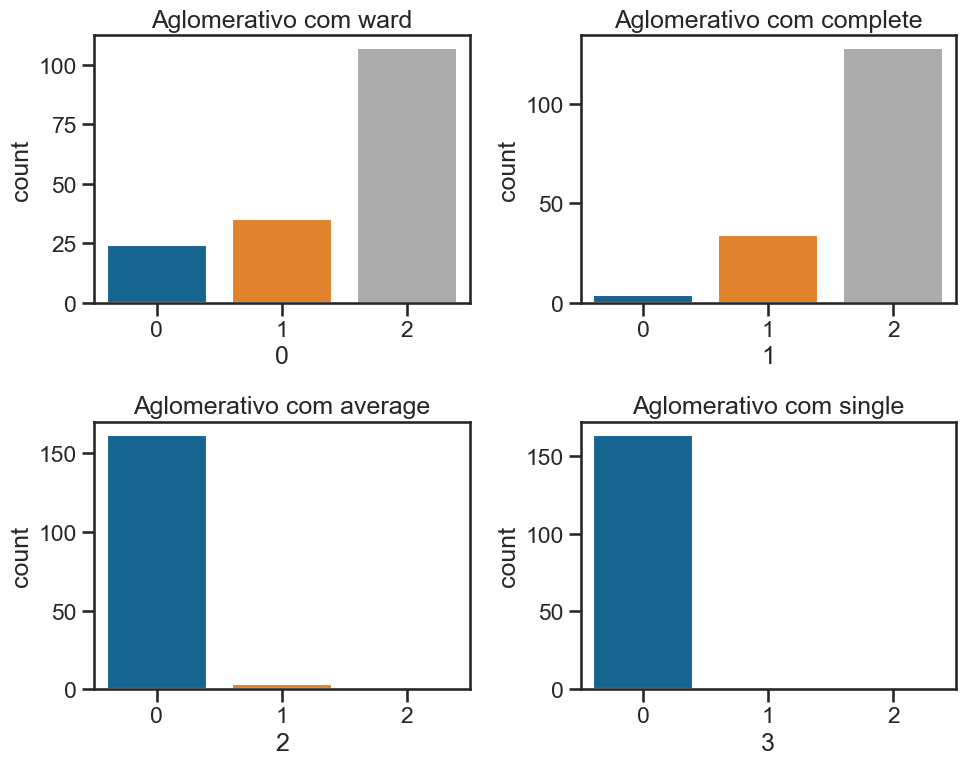

In [73]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(221)
sns.countplot(x=distribuicao.T[0])
ax.set_title('Aglomerativo com ward')

ax = fig.add_subplot(222)
sns.countplot(x=distribuicao.T[1])
ax.set_title('Aglomerativo com complete')

ax = fig.add_subplot(223)
sns.countplot(x=distribuicao.T[2])
ax.set_title('Aglomerativo com average')

ax = fig.add_subplot(224)
sns.countplot(x=distribuicao.T[3])
ax.set_title('Aglomerativo com single')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Distancias')

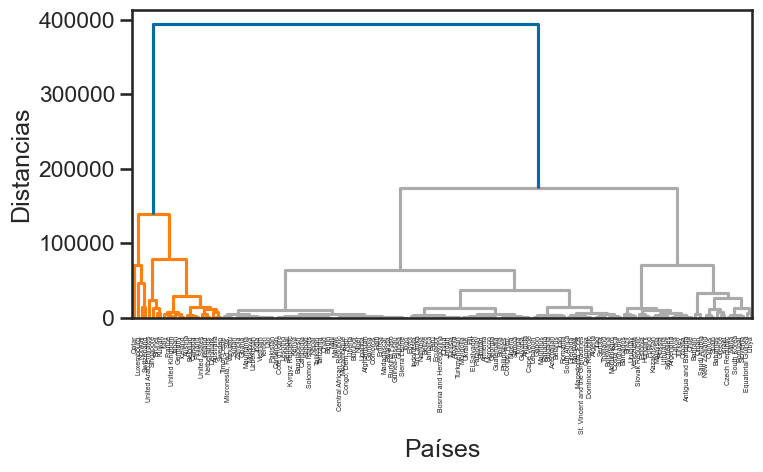

In [74]:
plt.style.use('tableau-colorblind10')
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

linkage = sch.linkage(country, method="ward")
dendrogram = sch.dendrogram(linkage, labels=country.index, leaf_rotation=90)

ax.set_xlabel('Países')
ax.set_ylabel('Distancias')

__________________________

In [75]:
model_raw_medoid = KMedoids(n_clusters=3, max_iter=1000, random_state=42)

model_raw_medoid.fit(country[vars])
country['clusters_medoid'] = model_raw_medoid.predict(country[vars])

In [76]:
cluster_0 = len(country[country['clusters_medoid'] == 0])
cluster_1 = len(country[country['clusters_medoid'] == 1])
cluster_2 = len(country[country['clusters_medoid'] == 2])

In [77]:
print(f"""Cluster 0: {cluster_0}
Cluster 1: {cluster_1}
Cluster 2: {cluster_2}""")

Cluster 0: 32
Cluster 1: 82
Cluster 2: 52


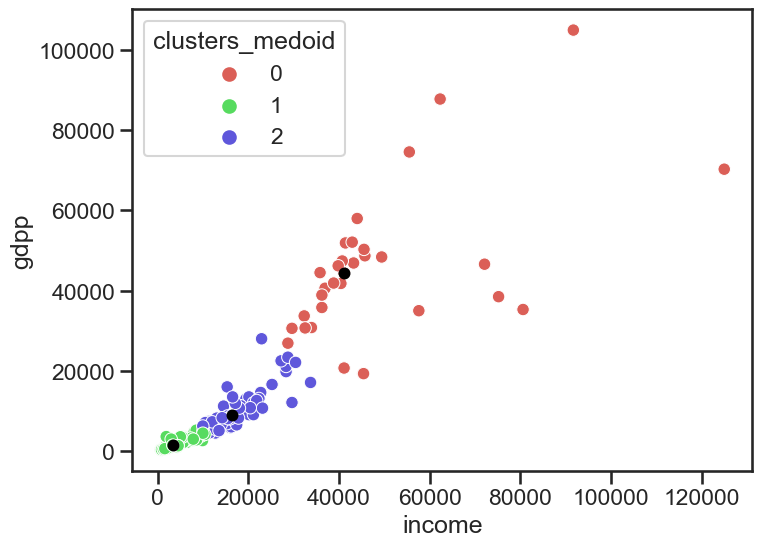

In [78]:
medoids = model_raw_medoid.cluster_centers_
plt.figure(figsize = (8,6))
sns.scatterplot(data= country, x=X1,y=X2, hue= country['clusters_medoid'], palette= sns.color_palette('hls', 3))

plt.scatter(medoids[:,0], medoids[:,1] , c= 'black', s=50)
plt.show()

In [79]:
cluster_0 = country[country['clusters_medoid']==0]
cluster_1 = country[country['clusters_medoid']==1]
cluster_2 = country[country['clusters_medoid']==2]
cluster_0['dist_2'] = (cluster_0[X1]-medoids[0,0])**2 + (cluster_0[X2]-medoids[0,1])**2
cluster_1['dist_2'] = (cluster_1[X1]-medoids[0,0])**2 + (cluster_1[X2]-medoids[0,1])**2
cluster_2['dist_2'] = (cluster_2[X1]-medoids[0,0])**2 + (cluster_2[X2]-medoids[0,1])**2
index_min_0 = cluster_0['dist_2'][cluster_0['dist_2'] == cluster_0['dist_2'].min()].index
index_min_1 = cluster_1['dist_2'][cluster_1['dist_2'] == cluster_1['dist_2'].min()].index
index_min_2 = cluster_2['dist_2'][cluster_2['dist_2'] == cluster_2['dist_2'].min()].index

In [80]:
print(f"""Os 3 países que representam os cluster nos dados originais são:
Cluster 0: {index_min_0[0]}
Cluster 1: {index_min_1[0]}
Cluster 2: {index_min_2[0]}""")

Os 3 países que representam os cluster nos dados originais são:
Cluster 0: Belgium
Cluster 1: Tunisia
Cluster 2: Slovenia
